In [1]:
# binance data
#import ccxt 
from binance.client import Client
from binance.websockets import BinanceSocketManager

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline  

# for computing indicators
from stockstats import StockDataFrame as Sdf # https://pypi.org/project/stockstats/

# backtesting library
# note if you download the anaconda ffn distribution, it will not work correctly
# you need to download the library locally from https://github.com/pmorissette/ffn
import sys
sys.path.insert(0, r'D:\Libraries\ffn-master')
import ffn
import bt

from datetime import datetime, timedelta, timezone

from price_data import *
from strategy import *

import time

In [2]:
client = Client()
symbols = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BNBUSDT']
n = len(symbols)

historical_data_fetcher = { symbol : HistDataFetcher(client, symbol) for symbol in symbols }
#historical_data_fetcher = { symbol : RecentDataFetcher(client, symbol) for symbol in symbols }

In [3]:
# init strategies
sma_backtester = SMACrossover(symbols, historical_data_fetcher, params = {'slow_sma':8, 'fast_sma':5})

In [4]:
start_datetime = datetime(2018,1,1).replace(tzinfo = timezone.utc) # utc time IMPORTANT
end_datetime = datetime(2021,3,20).replace(tzinfo = timezone.utc)#start_datetime+timedelta(weeks=145)

interval = '1d'

# create backtests
bt1 = sma_backtester.get_backtest(interval, start_datetime, end_datetime, Strategy.FULLY_ALLOCATE)
bt2 = sma_backtester.get_backtest(interval, start_datetime, end_datetime, Strategy.FIX_WEIGHTS)


# benchmark backtest is even weighted portfolio of all assets
benchmark = BacktestUtils.get_benchmark_bt()

sma_crossover_8_5 1d full
0% [############################# ] 100% | ETA: 00:00:00sma_crossover_8_5 1d fixed
0% [############################# ] 100% | ETA: 00:00:00benchmark
0% [############################# ] 100% | ETA: 00:00:00

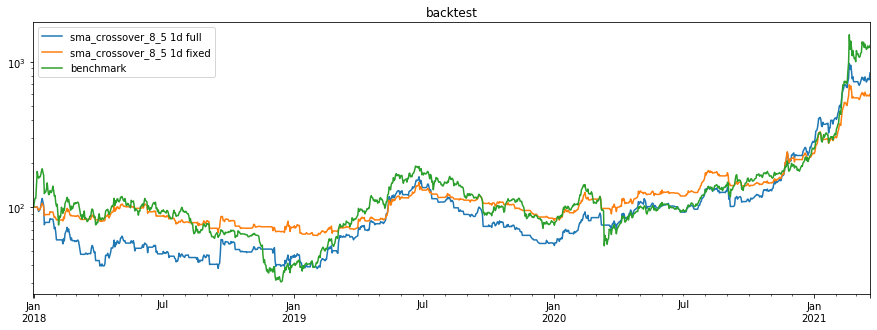

Stat                 sma_crossover_8_5 1d full    sma_crossover_8_5 1d fixed    benchmark
-------------------  ---------------------------  ----------------------------  -----------
Start                2017-12-31                   2017-12-31                    2017-12-31
End                  2021-03-20                   2021-03-20                    2021-03-20
Risk-free rate       0.00%                        0.00%                         0.00%

Total Return         738.39%                      498.41%                       1192.12%
Daily Sharpe         1.04                         1.09                          1.08
Daily Sortino        1.72                         1.82                          1.86
CAGR                 93.67%                       74.39%                        121.54%
Max Drawdown         -67.12%                      -45.46%                       -83.36%
Calmar Ratio         1.40                         1.64                          1.46

MTD                  14.92% 

In [5]:
res = BacktestUtils.run_backtest([bt1,bt2, benchmark], sma_backtester.close_prices)
BacktestUtils.plot_backtest(res)
BacktestUtils.display_stats(res)